In [ ]:
!conda update --all
!co

 1. Install Dependencies and Setup

In [568]:
pip install scikit-learn==

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'scikit-learn==': Expected end or semicolon (after name and no valid version specifier)
    scikit-learn==
                ^

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [569]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/294.9 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/294.9 kB 1.3 MB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 297.7 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 403.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 403.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 403.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 312.2 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 312.2 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 312.2 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 312.2 kB/s


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [570]:
pip install scikit-learn==<version>

Note: you may need to restart the kernel to use updated packages.


The syntax of the command is incorrect.


In [571]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
altair                    5.2.0
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asgiref                   3.7.2
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.7.0
cachetools                5.3.3
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
Django                    5.0.3
executing          

In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [3]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir):
    image_class_path = os.path.join(data_dir, image_class)

    # Check if the current item is a directory
    if os.path.isdir(image_class_path):
        for image in os.listdir(image_class_path):
            image_path = os.path.join(image_class_path, image)
            try: 
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts: 
                    print(f'Image not in ext list: {image_path}')
                    os.remove(image_path)
            except Exception as e: 
                print(f'Issue with image: {image_path} - {e}')
                # Uncomment the next line if you want to remove problematic files
                # os.remove(image_path)

# 3. Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 844 files belonging to 4 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()

In [20]:
len(batch)

2

In [21]:
batch[1]


array([3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 1, 0, 3, 3, 2, 2, 1, 3, 1, 1, 0, 1,
       0, 1, 3, 0, 0, 1, 0, 1, 3, 1])

In [22]:
# Class mapping
class_names = {0: 'ECZEMA', 1: 'VITILIGO', 2: 'ACNE', 3: 'CHICKEN POX'}

# Example prediction for batch[1]
batch_1_predictions = [2, 1, 0, 3, 1]  # Replace with actual predictions

# Iterate over the predictions in batch[1] and print the corresponding class name
for i, prediction in enumerate(batch_1_predictions):
    class_name = class_names[prediction]
    print(f" Class {prediction} is {class_name}")



 Class 2 is ACNE
 Class 1 is VITILIGO
 Class 0 is ECZEMA
 Class 3 is CHICKEN POX
 Class 1 is VITILIGO


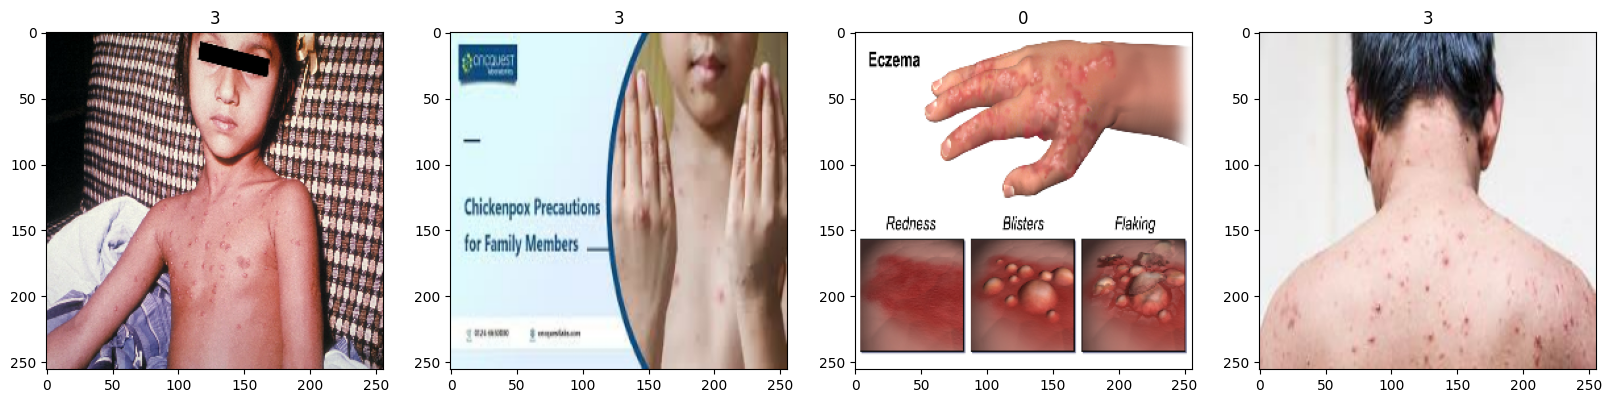

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Index 0
Index 1
Index 2
Index 3
Index 4


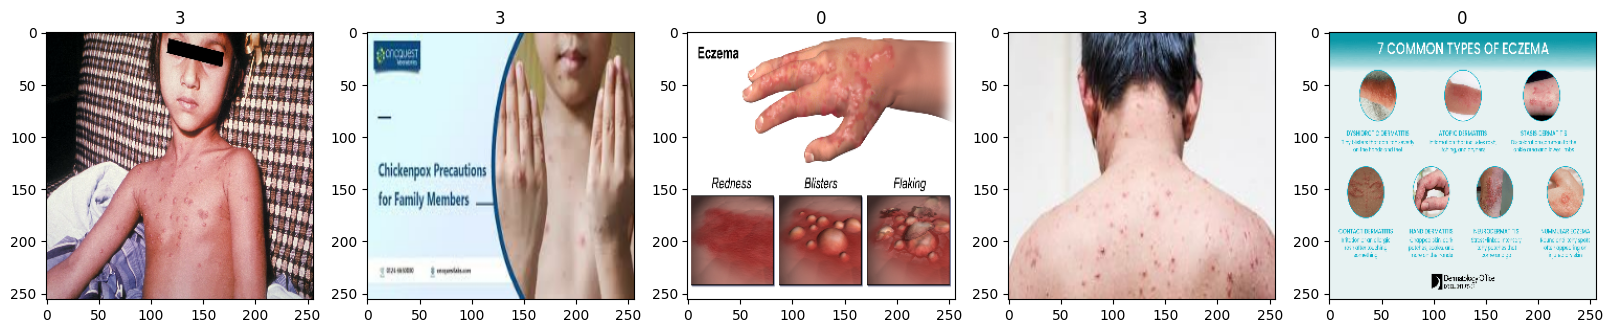

In [24]:
# import matplotlib.pyplot as plt

# Assuming batch[0] contains your images and batch[1] contains titles

num_cols = 5
fig, ax = plt.subplots(ncols=num_cols, figsize=(20, 20))

# Loop over the number of subplots and batch images
for idx in range(num_cols):
    if idx < len(batch[0]):  # Ensure we do not go out of bounds
        img = batch[0][idx]
        ax[idx].imshow(img.astype(int))
        ax[idx].title.set_text(batch[1][idx])
    print(f"Index {idx}")

# Hide any unused subplots
for j in range(len(batch[0]), num_cols):
    ax[j].axis('off')

plt.show()


# 4. Scale Data

In [25]:
data = data.map(lambda x,y: (x/255, y))

In [26]:
data.as_numpy_iterator().next()

(array([[[[0.5065717 , 0.43011642, 0.33504137],
          [0.5162837 , 0.43982843, 0.34475338],
          [0.52924323, 0.452788  , 0.35771292],
          ...,
          [0.41428828, 0.398602  , 0.36330786],
          [0.4157712 , 0.40366948, 0.37554446],
          [0.41568628, 0.40392157, 0.3764706 ]],
 
         [[0.43870252, 0.37700674, 0.29962468],
          [0.44841453, 0.38671875, 0.3093367 ],
          [0.46137407, 0.39967832, 0.32229626],
          ...,
          [0.41723782, 0.40155154, 0.36625743],
          [0.41602328, 0.40392157, 0.37579656],
          [0.41568628, 0.40392157, 0.3764706 ]],
 
         [[0.35115254, 0.32095188, 0.2651844 ],
          [0.3626335 , 0.33243284, 0.27666536],
          [0.3758425 , 0.34564185, 0.28987437],
          ...,
          [0.41875765, 0.40307137, 0.36777726],
          [0.41969538, 0.40759367, 0.37946868],
          [0.41960785, 0.40784314, 0.38039216]],
 
         ...,
 
         [[0.5118413 , 0.4255668 , 0.3745864 ],
          [0.51057

# 5. Split Data

In [27]:
len(data)

27

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [29]:
train_size

18

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [31]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
import pandas
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [34]:
model = Sequential()

In [35]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Example input data with shape (batch_size, height, width, channels)
# Replace this with your actual data
input_data = np.random.rand(32, 256, 256, 3)  # Example: batch size of 32, 256x256 image with 3 channels (RGB)

# Define the model
model = Sequential()

# Add layers to the model
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))

# Continue with more layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Output layer for a 4-class classification problem
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check the model summary
model.summary()

# Fit the model to the data (example)
model.fit(input_data, np.random.rand(32, 4), epochs=10)  # Replace with your actual labels and data


C:\Users\LiTe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 500000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      64,000,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,005,732 (244.16 MB)

 Trainable params: 64,005,732 (244.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 2.6926
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step - accuracy: 0.2812 - loss: 98.5625
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step - accuracy: 0.2500 - loss: 50.0812
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step - accuracy: 0.2188 - loss: 112.7547
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step - accuracy: 0.3125 - loss: 275.2513
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step - accuracy: 0.3125 - loss: 208.0668
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step - accuracy: 0.2812 - loss: 215.5827
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step - accuracy: 0.3438 - loss: 256.6713
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step - accuracy: 0.2812 - loss: 299.8882
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step - accuracy: 0.4688 - loss: 210.5754


In [36]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='softmax')
])


In [37]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,750,369 (60.08 MB)

 Trainable params: 15,750,369 (60.08 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
class MyDataset(tf.data.Dataset):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        


# 7. Train

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = 4  # Adjust this to the number of classes you have

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Number of units should match number of classes
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class
              metrics=['accuracy'])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,397,028 (28.22 MB)

 Trainable params: 7,397,028 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Data augmentation and preprocessing
dataset_path = 'data'  # Update with your actual dataset path

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
hist = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


Found 677 images belonging to 4 classes.
Found 167 images belonging to 4 classes.
Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 959ms/step - accuracy: 0.3247 - loss: 1.6727 - val_accuracy: 0.3473 - val_loss: 1.3109 - learning_rate: 0.0010
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 860ms/step - accuracy: 0.3839 - loss: 1.3348 - val_accuracy: 0.3413 - val_loss: 1.2604 - learning_rate: 0.0010
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 994ms/step - accuracy: 0.4039 - loss: 1.2718 - val_accuracy: 0.4611 - val_loss: 1.1793 - learning_rate: 0.0010
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 916ms/step - accuracy: 0.4069 - loss: 1.2401 - val_accuracy: 0.5269 - val_loss: 1.1259 - learning_rate: 0.0010
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4378 - loss: 1.2053 - val_accuracy: 0.5629 - val_loss: 1.0966 - learning_rate: 0.0010
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 938ms/step - accuracy: 0.4767 - loss: 1.1843 - val_accuracy: 0.5689 - val_loss: 1.0843 - learning_rate: 0.0010
Epo

In [45]:
logdir='logs'

In [46]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

In [47]:
def preprocess(image, label):
    # Convert label to integer type
    label = tf.cast(label, tf.int32)
    label = tf.one_hot(label, depth=num_classes)  # One-hot encode labels
    image = tf.image.resize(image, [img_height, img_width])  # Resize image
    image = image / 255.0  # Normalize image to [0, 1]
    return image, label

In [ ]:
import tensorflow as tf
import os

# Define the number of classes
num_classes = 4

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Multi-class output
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',  # Use categorical_crossentropy for one-hot labels
              metrics=['accuracy'])

# Define the TensorBoard callback
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Define the path to your dataset
dataset_path = 'data'  # Update with your actual dataset path

# Check if the dataset path exists
if not os.path.isdir(dataset_path):
    raise ValueError(f"Directory {dataset_path} does not exist.")

# Load the datasets
train = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),  # Match the input shape of your model
    batch_size=32
)

val = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),  # Match the input shape of your model
    batch_size=32
)

# Preprocess the dataset
def preprocess_dataset(dataset):
    def preprocess(image, label):
        label = tf.one_hot(label, depth=num_classes)  # One-hot encode labels
        return image, label
    
    dataset = dataset.map(preprocess)
    return dataset

# Apply preprocessing to the datasets
train = preprocess_dataset(train)
val = preprocess_dataset(val)

# Train the model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Data Preparation with Data Augmentation
# Assuming you are working with image data; adjust as needed for other data types
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    'data',  # Replace with your training data directory path
    target_size=(150, 150),  # Adjust based on your image size
    batch_size=32,
    class_mode='categorical'  # Use 'binary' if 2 classes, 'categorical' for multi-class
)

val_data = val_datagen.flow_from_directory(
    'validation_directory_path',  # Replace with your validation data directory path
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# 2. Build the Model with Regularization and Batch Normalization
model = Sequential([
    Flatten(input_shape=(150, 150, 3)),  # Adjust input shape based on your data
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),  # Add dropout to reduce overfitting
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Adjust the output layer based on the number of classes
])

# 3. Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Start with a moderate learning rate
    loss='categorical_crossentropy',  # Use 'binary_crossentropy' if binary classification
    metrics=['accuracy']
)

# 4. Setup Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# 5. Train the Model with Callbacks
history = model.fit(
    train_data,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    validation_steps=len(val_data),
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict on the validation set
y_true = []
y_pred = []

for batch in val.as_numpy_iterator():
    X, y = batch
    y_true.extend(tf.argmax(y, axis=-1).numpy())
    y_pred.extend(tf.argmax(model.predict(X), axis=-1).numpy())

# Convert lists to arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = class_names  # Ensure class_names is defined and matches your classes

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], 
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max()/2. else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print out accuracy, precision, recall for each class
accuracy = np.mean(y_true == y_pred)
print("Overall Accuracy:", accuracy)

# Calculate metrics for each class
precision = tf.keras.metrics.Precision(num_classes=len(classes), average='macro')
recall = tf.keras.metrics.Recall(num_classes=len(classes), average='macro')
accuracy_metric = tf.keras.metrics.SparseCategoricalAccuracy()

precision.update_state(y_true, y_pred)
recall.update_state(y_true, y_pred)
accuracy_metric.update_state(y_true, y_pred)

print("Precision:", precision.result().numpy())
print("Recall:", recall.result().numpy())
print("Accuracy:", accuracy_metric.result().numpy())


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data',  # Update with your dataset path
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'data',  # Update with your dataset path
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Update the model as needed
model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[tensorboard_callback, early_stopping, reduce_lr]
)


# 8. Plot Performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [54]:
hist.history


{'accuracy': [0.7799113988876343,
  0.7769571542739868,
  0.7813884615898132,
  0.7754800319671631,
  0.8345642685890198,
  0.8286558389663696,
  0.8316100239753723,
  0.8522894978523254,
  0.8404726982116699,
  0.8508124351501465,
  0.8877400159835815,
  0.8714918494224548,
  0.8847858309745789,
  0.8729689717292786,
  0.9128507971763611,
  0.8877400159835815,
  0.890694260597229,
  0.9172821044921875,
  0.8995568752288818,
  0.905465304851532],
 'loss': [0.5970178842544556,
  0.5581238269805908,
  0.5975699424743652,
  0.5458982586860657,
  0.4991087317466736,
  0.49723005294799805,
  0.47202515602111816,
  0.4065353274345398,
  0.4683414697647095,
  0.40563684701919556,
  0.3447912037372589,
  0.35035839676856995,
  0.31463009119033813,
  0.3402634263038635,
  0.28297367691993713,
  0.2920514643192291,
  0.3106826841831207,
  0.26561620831489563,
  0.28106656670570374,
  0.2807748019695282],
 'val_accuracy': [0.7245509028434753,
  0.7544910311698914,
  0.742514967918396,
  0.7844311

# 9. Evaluate

In [60]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [61]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [62]:
num_samples = sum(len(batch[0]) for batch in test)
print(f'Number of samples in test dataset: {num_samples}')


Number of samples in test dataset: 64


In [66]:
import tensorflow as tf

# Initialize metrics
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()  # Use SparseCategoricalAccuracy if labels are not one-hot encoded

# Assume test dataset is available
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    # If labels are one-hot encoded, convert them to integer labels
    y = tf.argmax(y, axis=-1)  # Convert one-hot to integer labels
    yhat = tf.argmax(yhat, axis=-1)  # Convert predictions to integer labels

    # Update metrics
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

# Print results
print("Precision:", precision.result().numpy())
print("Recall:", recall.result().numpy())
print("Accuracy:", accuracy.result().numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Precision: 1.0
Recall: 0.734375
Accuracy: 1.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
import os

# Define the number of classes
num_classes = 4

# Define the model with Batch Normalization and Dropout
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(num_classes, activation='softmax')  # Multi-class output
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Use Adam optimizer with a specified learning rate
    loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
    metrics=['accuracy']
)

# Define callbacks
logdir = 'logs'
tensorboard_callback = TensorBoard(log_dir=logdir)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Define the path to your dataset
dataset_path = 'data'  # Update with your actual dataset path

# Check if the dataset path exists
if not os.path.isdir(dataset_path):
    raise ValueError(f"Directory {dataset_path} does not exist.")

# Load the datasets
train = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),  # Match the input shape of your model
    batch_size=32
)

val = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),  # Match the input shape of your model
    batch_size=32
)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.1),
])

# Preprocess the dataset
def preprocess_dataset(dataset, augment=False):
    def preprocess(image, label):
        if augment:
            image = data_augmentation(image)  # Apply data augmentation if augment is True
        label = tf.one_hot(label, depth=num_classes)  # One-hot encode labels
        return image, label
    
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.prefetch(tf.data.AUTOTUNE)

# Apply preprocessing and data augmentation to the datasets
train = preprocess_dataset(train, augment=True)
val = preprocess_dataset(val)

# Train the model
hist = model.fit(
    train, 
    epochs=20, 
    validation_data=val, 
    callbacks=[tensorboard_callback, early_stopping, reduce_lr]
)

# Evaluate the model
results = model.evaluate(val)
print(f"Validation Loss: {results[0]}")
print(f"Validation Accuracy: {results[1]}")


In [59]:
print(f'Precision{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy}')

Precision1.0, Recall:0.703125, Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>


In [67]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [83]:
import cv2 

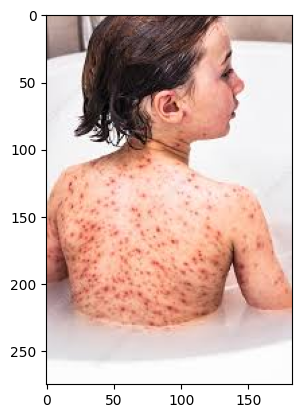

In [84]:
img = cv2.imread('testchickenpox.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

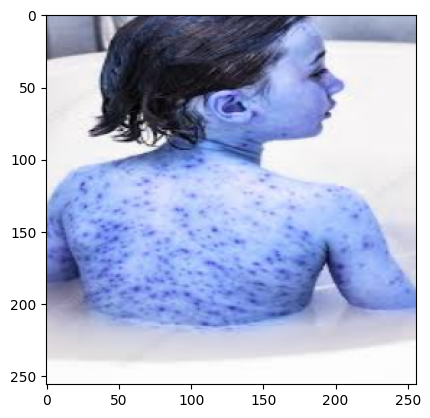

In [85]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [86]:
resize.shape


TensorShape([256, 256, 3])

In [87]:
input_image = np.expand_dims(resize, axis=0)


In [88]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [89]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [90]:
yhat

array([[0.10822273, 0.48172373, 0.20069389, 0.20935966]], dtype=float32)

In [76]:
print("yhat array:", yhat)
class_names = ["ECZEMA", "VITILIGO", "ACNE", "CHICKEN POX"]
predicted_class_index = np.argmax(yhat)
print(f"Predicted Class: {class_names[predicted_class_index]}")
print(f"Highest probability: {yhat[0][predicted_class_index]}")


yhat array: [[0.03684748 0.12281534 0.01284067 0.8274965 ]]
Predicted Class: CHICKEN POX
Highest probability: 0.8274965286254883


In [101]:


# Define the directory where your test images are stored
test_dir = 'C:/Users/LiTe/ImageClassification/Test'  # Replace with the path to your test images

# Define the mapping for classes
class_names = ['ECZEMA', 'VITILIGO', 'ACNE', 'CHICKEN POX']

# Create lists to hold data
image_ids = []
predictions = []

# Load the images, preprocess, and make predictions
for image_filename in os.listdir(test_dir):
    if image_filename.endswith(('.jpg', '.jpeg', '.png')):  # Consider common image file extensions
        image_id = os.path.splitext(image_filename)[0]
        image_path = os.path.join(test_dir, image_filename)

        # Preprocess the image
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))
        image_array = tf.keras.preprocessing.image.img_to_array(image)
        image_array = np.expand_dims(image_array, axis=0)  # Reshape for model input

        # Predict using the model
        prediction_probs = model.predict(image_array)[0]  # Get probabilities for all classes
        predicted_class = np.argmax(prediction_probs)  # Get the index of the highest probability
        predicted_label = class_names[predicted_class]

        # Store results
        image_ids.append(image_id)
        predictions.append((predicted_label, prediction_probs))

# Print the predictions
for image_id, prediction in zip(image_ids, predictions):
    print(f"Image ID: {image_id} -> Predicted: {prediction[0]}, Probabilities: {prediction[1]}")


# 11. Save the Model

In [79]:
from tensorflow.keras.models import load_model

In [80]:
model.save(os.path.join('models','Skin AI Detector.h5'))

In [81]:
new_model = load_model(os.path.join('models', 'Skin AI Detector.h5'))

In [82]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[0.10822273, 0.48172373, 0.20069389, 0.20935966]], dtype=float32)